<a href="https://colab.research.google.com/github/sakarla/Machine-Learning-for-Architecs/blob/main/week%208_Computer%20Vision/code/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Step 2: Load & Filter MNIST (Classes 0, 1, 2)

In [2]:
# Load full MNIST dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

# Filter to keep only labels 0, 1, 2
train_mask = (y_train_full < 3)
test_mask = (y_test_full < 3)

x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test_full[test_mask]
y_test = y_test_full[test_mask]

# Normalize and reshape to add channel dimension
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)  # shape: (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Show dataset shape
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (18623, 28, 28, 1)
Test shape: (3147, 28, 28, 1)


# Step 3: Visualize Sample Training Images

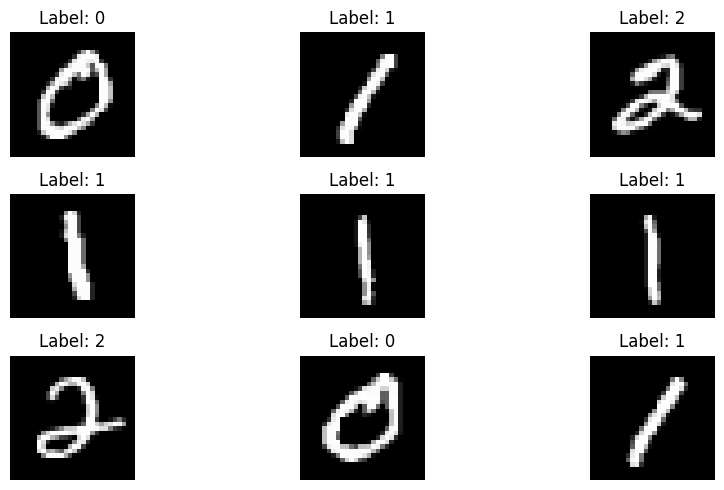

In [8]:
class_names = ['0', '1', '2']

plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


# Step 4: Build the CNN Model

In [3]:
num_classes = 3

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])


# Step 5: Compile the Model

In [4]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Step 6: Train the Model

In [5]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9598 - loss: 0.1279 - val_accuracy: 0.9959 - val_loss: 0.0126
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9971 - val_loss: 0.0056
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9984 - val_loss: 0.0034
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 0.9978 - val_loss: 0.0061
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9978 - val_loss: 0.0039


# Step 7: Plot Accuracy and Loss

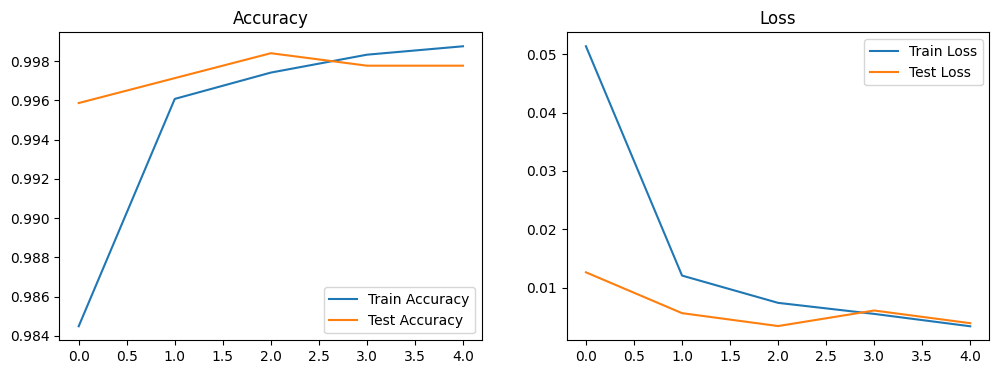

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Test Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Test Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Step 8: Confusion Matrix & Classification Report

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


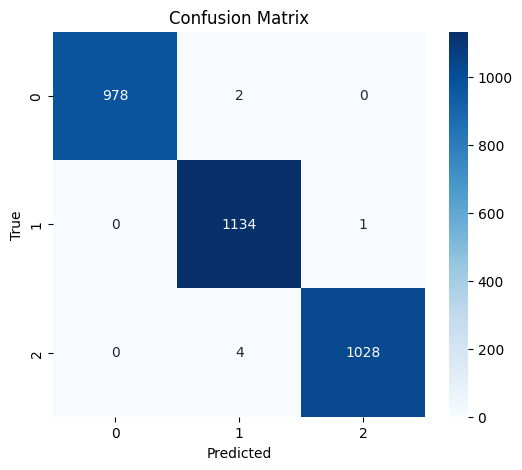

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147



In [11]:
# Predict class probabilities and convert to labels
logits = model.predict(x_test)
y_pred = np.argmax(logits, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


# Step 9: Visualize Predictions vs True Labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


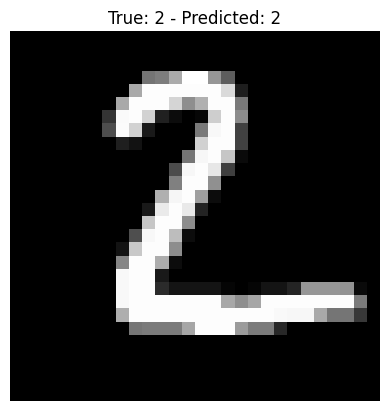

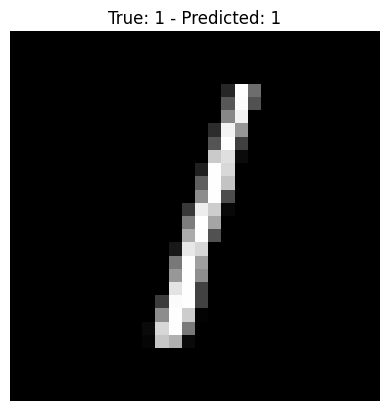

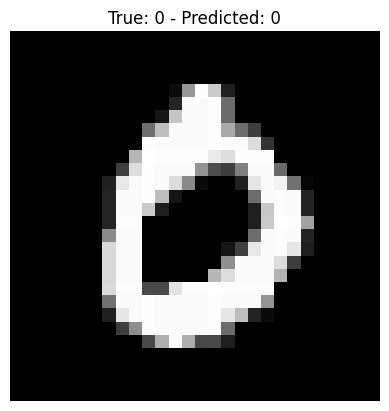

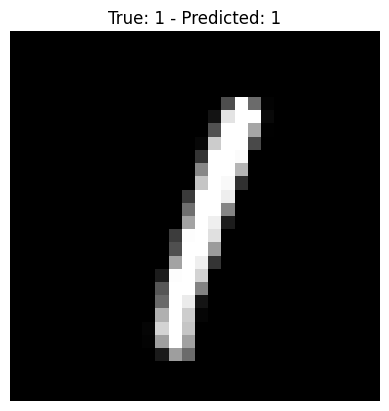

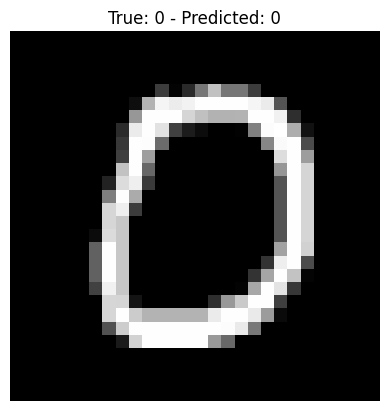

In [7]:
# Get predictions for first 5 test images
logits = model.predict(x_test[:5])
predicted_classes = np.argmax(logits, axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]} - Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()
